In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
print(X_train)
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[9 8 9 ... 4 5 3]


In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [11]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
[0 6 1 ... 8 6 6] [9 8 9 ... 4 5 3]
0.056390243902439026
Iteration:  10
[0 2 1 ... 8 1 5] [9 8 9 ... 4 5 3]
0.20031707317073172
Iteration:  20
[0 2 1 ... 8 1 8] [9 8 9 ... 4 5 3]
0.2345121951219512
Iteration:  30
[0 0 1 ... 8 1 8] [9 8 9 ... 4 5 3]
0.2581951219512195
Iteration:  40
[0 0 1 ... 8 1 1] [9 8 9 ... 4 5 3]
0.28153658536585363
Iteration:  50
[0 0 1 ... 8 1 1] [9 8 9 ... 4 5 3]
0.3077073170731707
Iteration:  60
[0 0 1 ... 8 1 1] [9 8 9 ... 4 5 3]
0.3400487804878049
Iteration:  70
[0 8 1 ... 8 3 1] [9 8 9 ... 4 5 3]
0.37409756097560976
Iteration:  80
[0 8 1 ... 8 3 1] [9 8 9 ... 4 5 3]
0.4115609756097561
Iteration:  90
[0 4 1 ... 4 3 1] [9 8 9 ... 4 5 3]
0.4541951219512195
Iteration:  100
[0 4 7 ... 4 3 3] [9 8 9 ... 4 5 3]
0.49890243902439024
Iteration:  110
[0 4 7 ... 4 3 3] [9 8 9 ... 4 5 3]
0.5276829268292683
Iteration:  120
[0 5 7 ... 4 3 3] [9 8 9 ... 4 5 3]
0.5520487804878049
Iteration:  130
[0 5 7 ... 4 3 3] [9 8 9 ... 4 5 3]
0.5728292682926829
Iteration: 

In [13]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


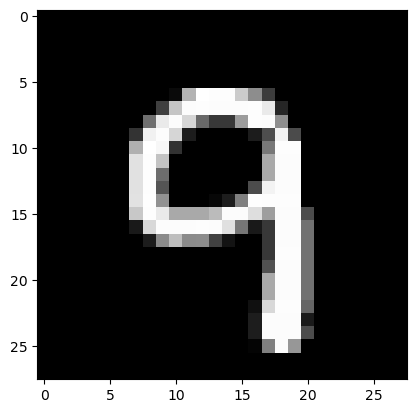

Prediction:  [8]
Label:  8


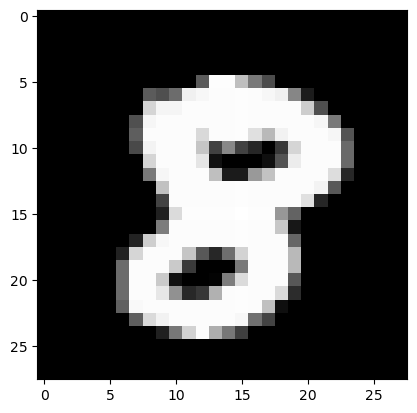

Prediction:  [9]
Label:  9


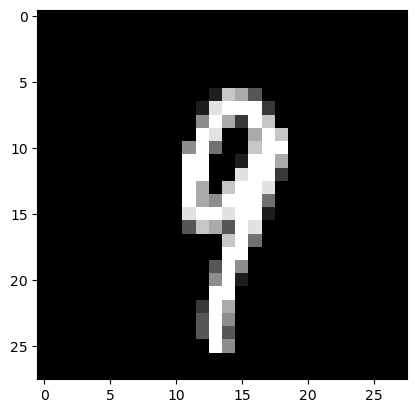

Prediction:  [8]
Label:  8


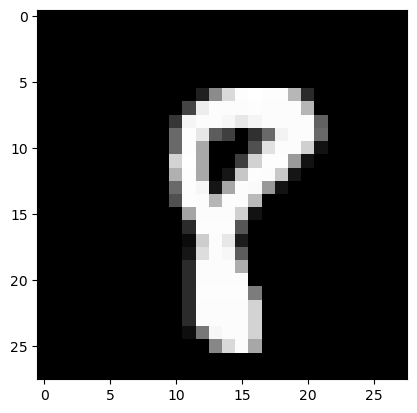

In [14]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [15]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 6 4 0 2 2 0 5 0 4 3 1 6 5 5 8 8 3 8 3 1 1 2 1 5 7 4 6 6 6 9 5 8 3 0 3 9
 1 1 5 8 7 2 8 1 2 8 9 4 5 8 4 4 8 8 4 5 2 6 9 2 7 3 2 1 9 4 7 1 2 7 0 7 7
 3 8 8 5 3 3 8 9 0 2 8 5 0 3 1 2 7 9 1 5 8 0 8 3 8 3 5 2 7 3 1 6 3 3 6 3 9
 9 6 1 7 7 1 8 6 7 0 4 6 1 7 1 2 8 9 1 1 1 5 0 3 5 7 6 8 2 0 1 3 2 2 8 0 7
 2 7 6 1 1 2 1 7 5 3 2 5 3 5 7 2 2 4 6 7 4 7 2 6 2 7 0 7 8 5 2 1 8 4 3 7 2
 0 1 7 1 5 6 4 9 3 4 7 0 9 2 8 5 8 6 3 8 1 0 7 8 8 6 1 7 9 7 7 2 8 8 2 8 8
 1 8 1 0 6 3 3 2 5 7 3 7 6 3 2 3 8 1 8 9 1 8 6 4 8 3 6 2 9 0 4 1 6 8 5 1 6
 6 8 8 4 3 4 9 3 1 4 8 9 9 1 0 2 1 4 0 3 2 9 2 0 2 2 2 4 1 5 1 7 8 7 7 1 7
 5 3 0 8 6 9 2 2 1 2 1 9 3 3 8 9 7 9 0 5 4 0 4 8 2 9 2 1 7 9 4 6 4 0 1 5 2
 2 9 3 7 6 1 4 7 6 9 8 1 6 4 2 4 4 2 9 5 3 1 2 3 8 0 3 2 6 5 1 9 1 8 1 3 0
 1 7 0 8 8 5 8 9 5 9 2 8 0 1 7 3 0 4 5 3 7 4 9 9 0 5 5 5 8 8 8 6 8 9 6 0 6
 2 0 7 5 9 8 9 3 4 1 8 0 1 3 4 6 0 7 8 3 7 2 1 0 7 7 1 8 7 6 3 8 0 8 7 4 6
 6 1 8 8 4 2 2 4 2 0 4 8 1 1 4 3 7 0 9 2 7 7 8 1 7 1 0 1 3 0 2 1 0 4 7 9 0
 3 5 7 2 3 5 2 5 1 6 6 1 

0.878

In [16]:
print("Weights 1:", W1)

Weights 1: [[ 0.16726682  0.13787233 -0.15401049 ... -0.21677227 -0.01414448
   0.48286083]
 [ 0.3897146  -0.37182782  0.04436207 ... -0.18246408 -0.12523676
  -0.03966578]
 [-0.19326956  0.14630265  0.34891126 ...  0.40762663  0.15516543
  -0.07038004]
 ...
 [ 0.35503098 -0.30549635 -0.40542343 ... -0.45079177 -0.32452712
  -0.21240185]
 [ 0.40219735  0.47388547 -0.32297347 ...  0.40675527 -0.21334991
   0.0769505 ]
 [ 0.41624852 -0.2523257  -0.44600784 ... -0.00439876 -0.22327367
   0.45594298]]


In [17]:
print("Bias 1:", b1)

Bias 1: [[0.48070589]
 [1.34520767]
 [0.36364553]
 [0.62898221]
 [0.35926508]
 [0.94367938]
 [0.80145282]
 [1.19102916]
 [1.04705748]
 [0.90056553]]


In [18]:
print("Weights 2:", W2)

Weights 2: [[-1.28926303e-01  2.33825199e-01  3.57323012e-01 -5.15888809e-01
  -5.92420412e-01  2.88968967e-01  7.98272222e-01  3.06742910e-01
   1.54500472e-01 -4.00045080e-01]
 [ 6.16979849e-01 -3.02851159e-01  4.14954950e-01  6.13644759e-01
  -2.91844727e-01 -1.13089499e-01 -7.75320422e-01  1.28121483e-02
  -3.71242352e-01  4.67600526e-01]
 [-4.17993807e-01 -2.57426890e-01 -2.15947654e-01  3.44649689e-01
  -3.95899375e-01 -2.75639282e-01 -4.61123825e-01  8.38923333e-01
   3.64748057e-01 -4.23086553e-01]
 [ 2.07196611e-02 -1.07565609e-01  3.02557845e-01  9.41643516e-01
  -6.14488390e-01  4.33917237e-01  1.58213096e-01 -8.53074935e-02
  -2.07365174e-01 -1.00302577e+00]
 [-2.15080415e-02 -2.61131232e-01 -8.50178222e-02 -2.65445289e-01
   1.01089595e+00  3.63825273e-01 -2.13007233e-01 -4.28586328e-01
  -6.05473402e-01  9.04152717e-02]
 [-3.08330896e-01  2.06840249e-01 -3.61344992e-01  1.00615903e-01
  -2.22108937e-01  4.92587323e-01  6.44085566e-01 -3.36468079e-02
  -3.86978765e-01  2.5

In [19]:
print("Bias 2:", b1)

Bias 2: [[0.48070589]
 [1.34520767]
 [0.36364553]
 [0.62898221]
 [0.35926508]
 [0.94367938]
 [0.80145282]
 [1.19102916]
 [1.04705748]
 [0.90056553]]
